# 1 Team 112 Report - How Music Affects Our Emotions

# 2 Executive Summary

# 3 Ethical Considerations

# 4 Introduction

# 5 Data Description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df_emot = pd.read_csv('music_annotations.csv')
df_emot.head()

,track id,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mother tongue
0,1,classical,0,1,0,0,0,0,1,1,0,3,1,0,21,1,English
1,1,classical,0,0,0,1,0,0,0,0,0,3,0,1,41,1,Dutch
2,1,classical,0,0,0,1,0,0,0,0,1,3,0,0,24,1,English
3,1,classical,0,0,0,0,1,0,0,0,0,3,0,0,32,0,Spanish
4,1,classical,0,0,0,1,1,0,0,0,0,4,0,1,21,0,English


In [2]:
# strip spaces in columns 
df_emot.columns = df_emot.columns.str.strip()

# drop NAs
df_emot.dropna(axis=0, inplace = True)

In [3]:
df_emot['genre'].value_counts()

classical     2688
rock          2038
pop           1855
electronic    1826
Name: genre, dtype: int64

In [4]:
df_emot.shape

(8407, 17)

# 6 Methods

# 6.1 Classifiers

## 6.1 Bootstrapping data

We created three classifiers with our data in order to predict the genre of a song
based off all the features in our dataset. However, before doing this, we had to bootstrap our data for equally weighed samples.

In [5]:
# without bootstrapping

df_emot['genre'].value_counts()

classical     2688
rock          2038
pop           1855
electronic    1826
Name: genre, dtype: int64

Without boostrapping, there are way more classical genre counts than any other genre,
which will lead to overprediction in our classifiers. Therefore, we must extract random samples from other genre counts in order to create equal counts.

In [6]:
# number of each to be sampled to equally weigh out dataframe
rock_sample = 2688 - 2038
pop_sample = 2688 - 1855
electronic_sample = 2688 - 1826
rock_sample, pop_sample, electronic_sample

(650, 833, 862)

In [7]:
from sklearn.utils import resample

# resampling the other genre counts
df_rock = df_emot[(df_emot['genre'] == 'rock')].sample(650, replace=True)
df_pop = df_emot[(df_emot['genre'] == 'pop')].sample(833, replace=True)
df_electronic = df_emot[(df_emot['genre'] == 'electronic')].sample(862, replace=True)

In [8]:
# appending counts to new bootstrapped dataframe
df_emot_equal = df_emot.append(df_rock)
df_emot_equal = df_emot_equal.append(df_pop)
df_emot_equal = df_emot_equal.append(df_electronic)

/var/folders/jp/5d1cmmq52x19b5x087vfqjw40000gn/T/ipykernel_55690/447018031.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_emot_equal = df_emot.append(df_rock)
/var/folders/jp/5d1cmmq52x19b5x087vfqjw40000gn/T/ipykernel_55690/447018031.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_emot_equal = df_emot_equal.append(df_pop)
/var/folders/jp/5d1cmmq52x19b5x087vfqjw40000gn/T/ipykernel_55690/447018031.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_emot_equal = df_emot_equal.append(df_electronic)


In [9]:
df_emot_equal['genre'].value_counts()

classical     2688
rock          2688
electronic    2688
pop           2688
Name: genre, dtype: int64

There are now equal samples of data, which avoids overprediction.

## 6.1.2 Cross validation

Since our dataset contains many samples, we prefer to not use cross validation. However, we apply it demonstrate a comparison in results.

## 6.1.3 scale normalization

We use scale normalization to ensure equal variances among all of our variables. 
However, it is not deemed as too necessary, since the most of our columns are 0's and 1's.
However, we use it to show any difference between results.

## 6.1.4 Decision Tree Classifier

We will be building a decision tree in order to see (ask someone about this)

## 6.1.5 Random Forest Classifier

We will be building a random forest classifier in order to predict each genre based off
our features.

## 6.1.4 Knn Classifier

We will be also building a knn classifier to compare to our random forest classifier
to discuss with classifier is better for this data.

# 6.2 K-Means Clustering

We use K-means clustering to cluster track id's into new clusters based on the emotions 
they evoke rather than the pre-existing genres they belong to.

## 6.2.1 Averaging each song's emotions

bla bla bla

In [10]:
# df used for this algorithm
df_emot_avg = df_emot.groupby(['track id']).mean()
# only subset emotions
df_emot_avg = df_emot_avg.loc[:, 'amazement':'sadness']
# df_emot_avg = df_emot_avg.reset_index()
df_emot_avg

/var/folders/jp/5d1cmmq52x19b5x087vfqjw40000gn/T/ipykernel_55690/2907687335.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_emot_avg = df_emot.groupby(['track id']).mean()


,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness
track id,,,,,,,,,
1,0.145833,0.333333,0.208333,0.291667,0.625000,0.020833,0.083333,0.062500,0.312500
2,0.106383,0.170213,0.425532,0.340426,0.744681,0.042553,0.021277,0.021277,0.106383
3,0.173913,0.347826,0.130435,0.173913,0.065217,0.282609,0.413043,0.239130,0.152174
4,0.119048,0.142857,0.523810,0.452381,0.761905,0.023810,0.000000,0.023810,0.142857
5,0.045455,0.295455,0.318182,0.522727,0.318182,0.045455,0.068182,0.181818,0.318182
...,...,...,...,...,...,...,...,...,...
396,0.250000,0.166667,0.250000,0.500000,0.333333,0.000000,0.166667,0.083333,0.166667
397,0.090909,0.090909,0.090909,0.181818,0.181818,0.363636,0.000000,0.363636,0.545455
398,0.272727,0.000000,0.000000,0.363636,0.272727,0.181818,0.636364,0.272727,0.181818


## 6.2.1 scale normalization

# 7 Results

## 7.1 Decision Tree Classifier

`max_depth` = 5 because there are so many columns. It is insufficient to only ask the data 3 questions, so increasing it to 3 considers the complexity of the data to determine a genre.

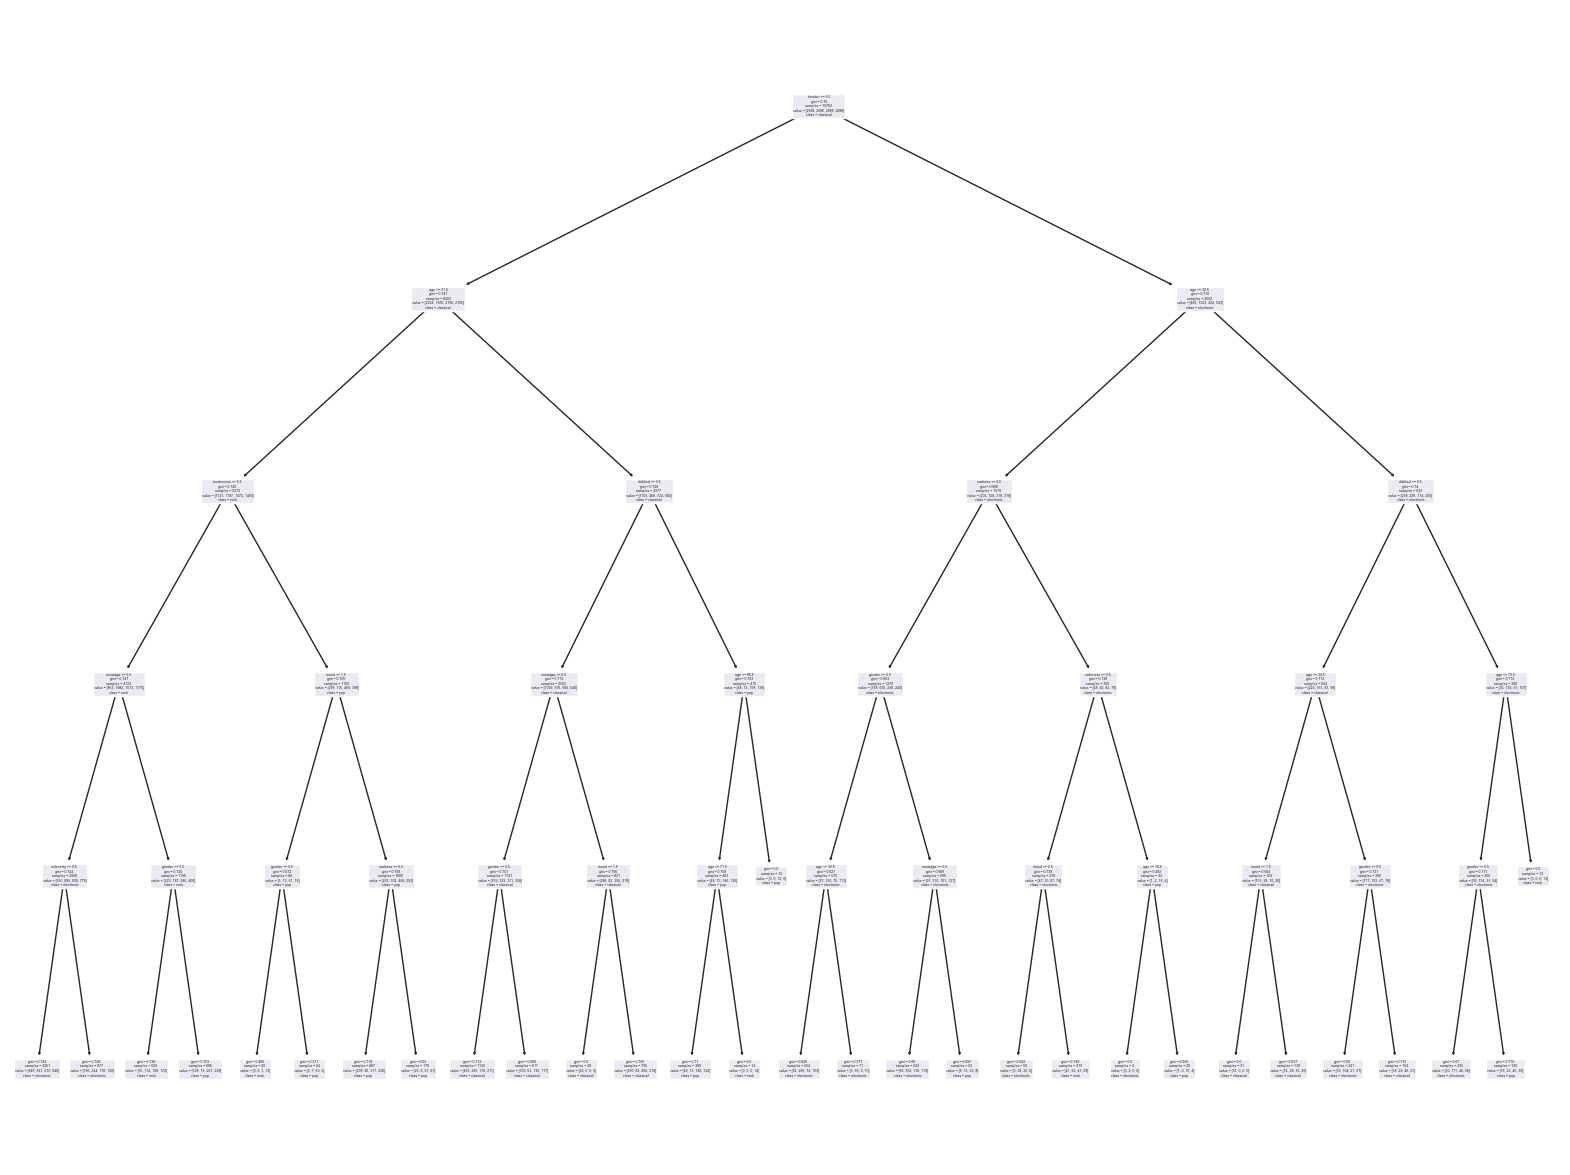

In [27]:
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

max_depth = 5

# discard any missing rows 
df_emot.dropna(axis=0, inplace = True)

# gather x features
x_feat_list = []
for feat in df_emot.columns[2:16]:
    x_feat_list.append(feat)

# extract data from dataframe
x = df_emot_equal.loc[:, x_feat_list].values
y = df_emot_equal.loc[:, 'genre'].values

# build decision tree classifier
dec_tree_clf = tree.DecisionTreeClassifier(max_depth = max_depth)

# fit data
dec_tree_clf = dec_tree_clf.fit(x, y)

# initialize empty figure (plot tree sets text size to fill given figure)
plt.figure()
plt.gcf().set_size_inches(20, 15)

# plot decision tree
tree.plot_tree(dec_tree_clf,
               feature_names=x_feat_list,
               class_names=dec_tree_clf.classes_);

# save
f = 'dec_tree_clf.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')

## 7.2 Random Forest Classifier

We pick a random forest classifier because (put in why its better than a knn classifier for this data). Let's find what the optimal max_depth would be for the random forest classifier

In [37]:
def plot_confusion_matrix(y_true, y_pred, label, picture):
    """
    plots confusion matrix
    """
    
    # build and plot confusion matrix
    sns.set(font_scale=1.2)
    conf_mat = confusion_matrix(y_true = y_true, y_pred = y_pred)
    conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels = np.unique(y))
    conf_mat_disp.plot()
    plt.gcf().set_size_inches(7, 7)
    plt.grid(False)
    plt.suptitle(label)
    
    # save
    f = picture
    with PdfPages(f) as pdf:
        pdf.savefig(bbox_inches='tight')

In [13]:
def compute_acc(y_true, y_pred):
    """
    computes accuracy score
    """
    acc_score = accuracy_score(y_test, y_pred)
    return f'accuracy score: {acc_score}'

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
# accuracy score
from sklearn.metrics import accuracy_score

In [15]:
def plot_max_depth(x, y, classifier):
    """plots max depth vs accuracy score to determine best
    max_depth for classifier to optimize accuracy score
    """
    
    score_ls = []

    for max_depth in range(1, 20, 2):
        # intialize random forest
        clf = classifier(max_depth=max_depth)


        x_train, x_test, y_train, y_test = train_test_split(
            x, y, test_size=0.30) 


        # fit data
        clf = dec_tree_clf.fit(x_train, y_train)

        # estimate on test data
        y_pred = clf.predict(x_test)


        acc_score = accuracy_score(y_test, y_pred)
        score_ls.append(acc_score)

    plt.plot(range(1, 20, 2), score_ls)
    

In [30]:
# gather all features 
# gather x features
x_feat_list = []
for feat in df_emot_equal.columns[2:16]:
    x_feat_list.append(feat)


# extract data from dataframe
x = df_emot_equal.loc[:, x_feat_list].values
y = df_emot_equal.loc[:, 'genre'].values


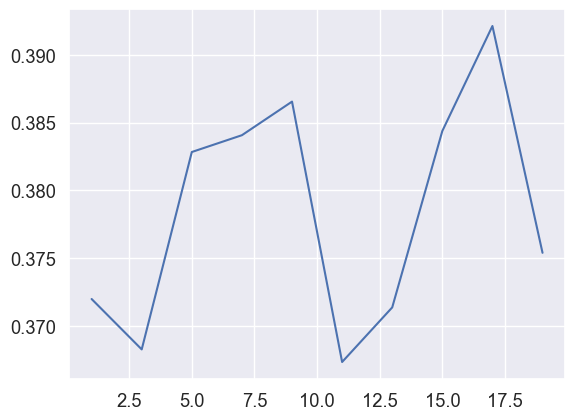

In [31]:
# plot max depth vs accuracy score for random forest
plot_max_depth(x, y, RandomForestClassifier)

# save
f = 'max_depth_rf.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')

17 seems to be the correct max_depth for random forest classifier. Lets go ahead and build the confusion matrix.

## no bootstrapping, no cross validation

In [32]:
# extract data from dataframe
x = df_emot.loc[:, x_feat_list].values
y = df_emot.loc[:, 'genre'].values

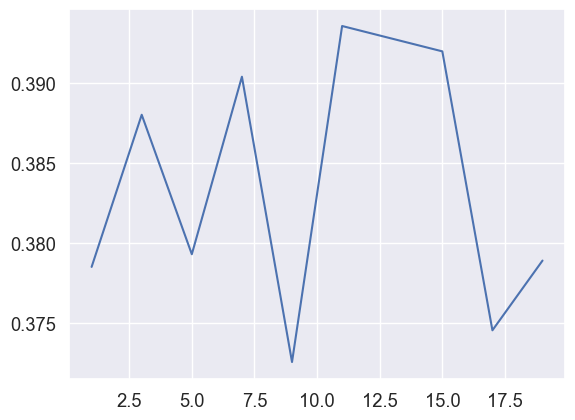

In [36]:
# best max depth?
plot_max_depth(x, y, RandomForestClassifier)

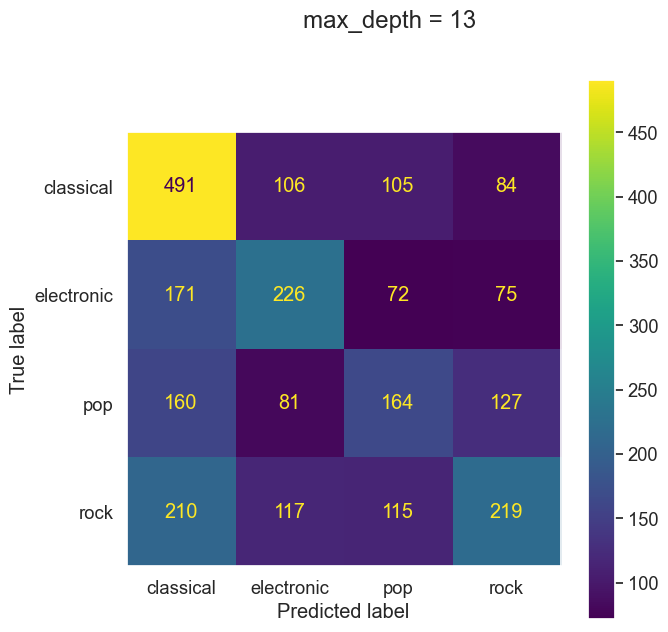

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split

# extract data from dataframe
x = df_emot.loc[:, x_feat_list].values
y = df_emot.loc[:, 'genre'].values

max_depth = 13

# intialize random forest
rf_clf = RandomForestClassifier(max_depth=max_depth)


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30)    

# fit data
rf_clf = rf_clf.fit(x_train, y_train)

# estimate on test data
y_pred = rf_clf.predict(x_test)


plot_confusion_matrix(y_test, y_pred, 'max_depth = 13', 'no bootstrapping')

In [39]:
compute_acc(y_test, y_pred)

'accuracy score: 0.4359889021006738'

Since our dataset is very big, cross validation may not be necessary. let's test by building a confusion matrix with accuracy score with and without cross validation.

## bootstrapping, no cross validation

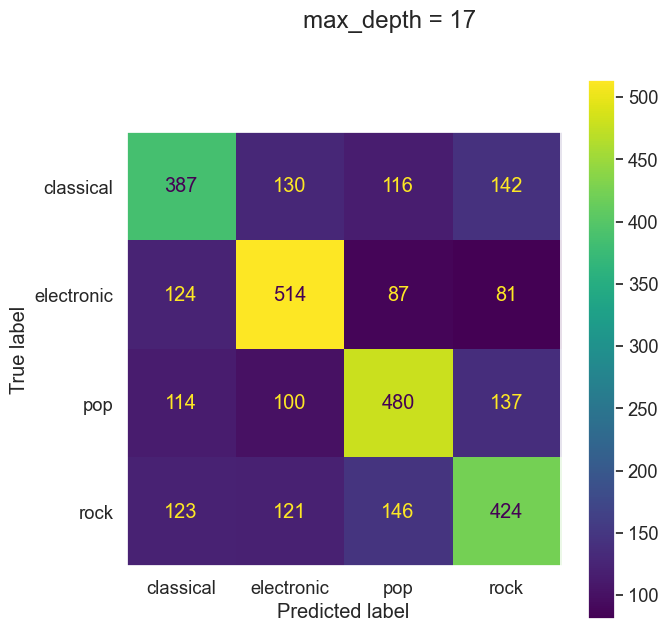

In [40]:
# extract data from dataframe
x = df_emot_equal.loc[:, x_feat_list].values
y = df_emot_equal.loc[:, 'genre'].values

max_depth = 17

# intialize random forest
dec_tree_clf = RandomForestClassifier(max_depth=max_depth)


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30)    

# fit data
dec_tree_clf = dec_tree_clf.fit(x_train, y_train)

# estimate on test data
y_pred = dec_tree_clf.predict(x_test)


plot_confusion_matrix(y_test, y_pred, 'max_depth = 17', 'rf_bootstrap_no_cross')

In [41]:
compute_acc(y_test, y_pred)

'accuracy score: 0.5595164290142591'

Bootstrapping increased accuracy score from 44 percent ot 56 percent, showing the importance of equally weighted samples. If not, classical is too overpredicted.

## Applying cross validation

let's see if cross validation is necessary

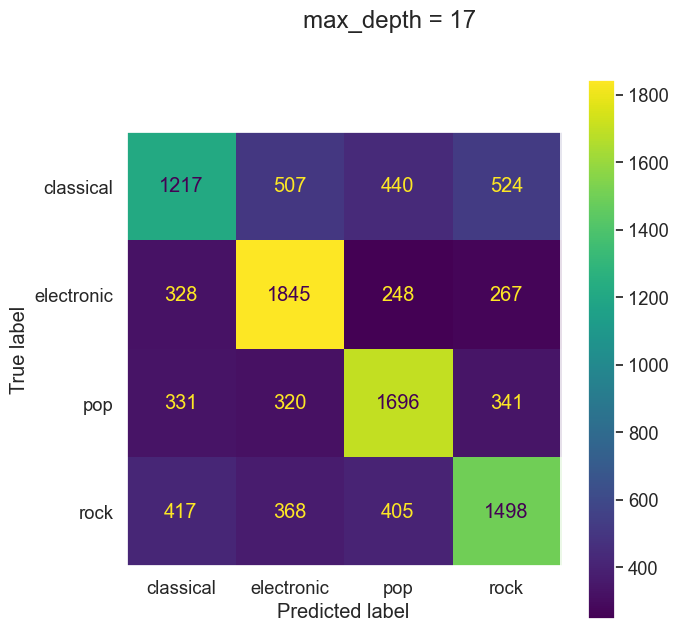

In [42]:
n_splits = 10
max_depth = 17

# extract data from dataframe
x = df_emot_equal.loc[:, x_feat_list].values
y = df_emot_equal.loc[:, 'genre'].values

# initialize k fold
skfold = StratifiedKFold(n_splits = n_splits)

# intialize random forest
rf_clf = RandomForestClassifier(max_depth=max_depth)

# initliaze y_pred, stores predictions in y
y_pred = np.empty_like(y)

for train_idx, test_idx in skfold.split(x, y):
    # get training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]


      # get test data
    x_test = x[test_idx, :]   


    # fit data
    rf_clf = rf_clf.fit(x_train, y_train)
    
    
    # estimate on test data
    y_pred[test_idx] = rf_clf.predict(x_test)

# # build and plot confusion matrix
# sns.set(font_scale=1.2)
# conf_mat = confusion_matrix(y_true = y, y_pred = y_pred)
# conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels = np.unique(y))
# conf_mat_disp.plot()
# plt.gcf().set_size_inches(7, 7)
# plt.grid(False)
# plt.suptitle('max_depth=5 decisiontree')

plot_confusion_matrix(y, y_pred, 'max_depth = 17', 'cross validation')


In [43]:
compute_acc(y, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [3226, 10752]

Cross validation did not have an effect on accuracy score.

## RandomForestClassifier feature importance

In [ ]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in MSE across all Decision Trees)')

In [ ]:
sns.set(font_scale = 1.2)

# number of decision trees in forest
n_estimators = 100
rf_clf = RandomForestClassifier(n_estimators=n_estimators)

# fit random forest to data
rf_clf.fit(x, y)

# plot
plot_feat_import(x_feat_list, rf_clf.feature_importances_)

## 7.3 KNN- Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### finding best max_depth

In [ ]:
def plot_best_k(x, y, classifier):
    """plots max depth vs accuracy score to determine best
    max_depth for classifier to optimize accuracy score
    """
    
    score_ls = []

    for k in range(1, 10, 1):
        # intialize random forest
        clf = classifier(n_neighbors = k)


        x_train, x_test, y_train, y_test = train_test_split(
            x, y, test_size=0.30) 


        # fit data
        clf = clf.fit(x_train, y_train)

        # estimate on test data
        y_pred = clf.predict(x_test)


        acc_score = accuracy_score(y_test, y_pred)
        score_ls.append(acc_score)

    plt.plot(range(1, 10, 1), score_ls)
    

In [ ]:
plot_best_k(x, y, KNeighborsClassifier)

k = 1 is optimal.

In [ ]:
# extract data from dataframe
x = df_emot_equal.loc[:, x_feat_list].values
y = df_emot_equal.loc[:, 'genre'].values

In [ ]:
k = 1
# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)


x_train, x_test, y_train, y_test = train_test_split(
            x, y, test_size=0.30) 


# fit data
dec_tree_clf = dec_tree_clf.fit(x_train, y_train)

# estimate on test data
y_pred = dec_tree_clf.predict(x_test)

plot_confusion_matrix(y_test, y_pred, 'k=1')

In [ ]:
compute_acc(y_test, y_pred)

In [ ]:
# knn classifier seems to do the same?

## 7.4 K-Means Clustering

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

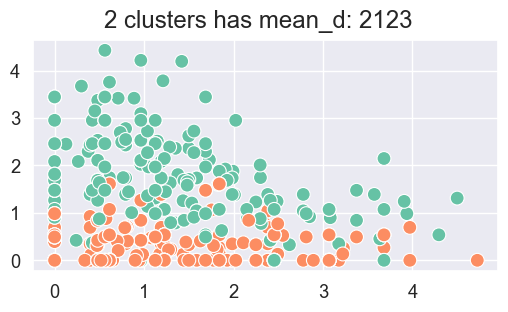

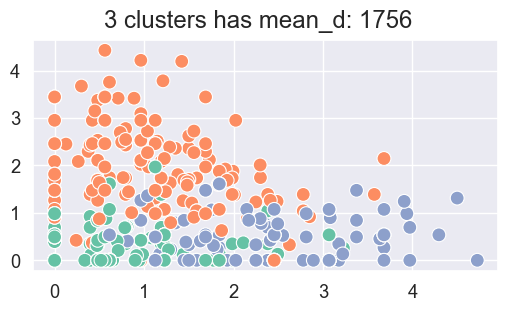

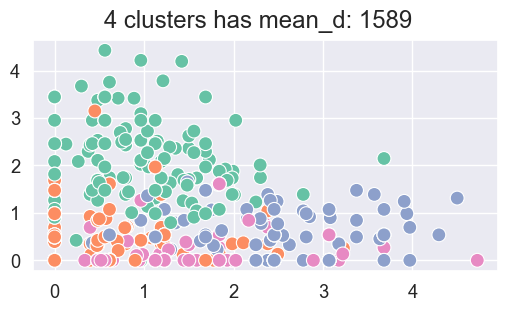

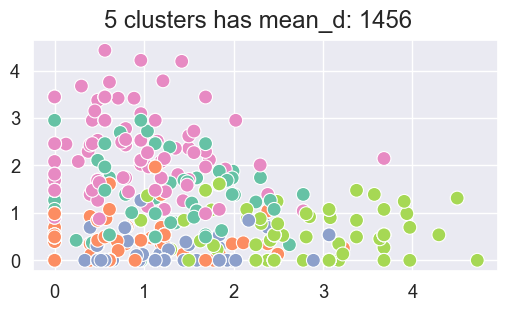

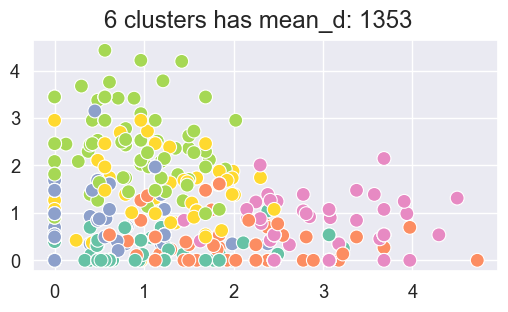

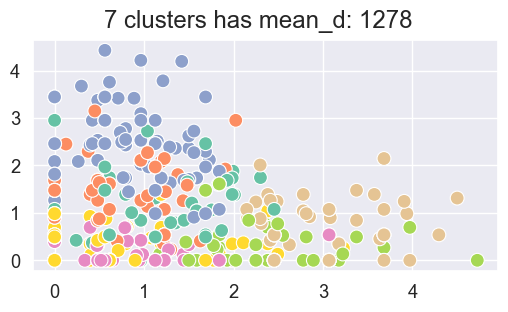

In [28]:
from sklearn.cluster import KMeans
from copy import copy

# gather x features
x_feat_list = []
for feat in df_emot_avg.columns[1:]:
    x_feat_list.append(feat)
    
# scale normalization
for feat in x_feat_list:
    df_emot_avg[feat] = df_emot_avg[feat] / df_emot_avg[feat].std()

# extract values from data frame
x = df_emot_avg.loc[:, x_feat_list].values

# intialize dict with clusters and mean distance
mean_d_dict = dict()
for n_clusters in range(2, 8):
    
    # fit kmeans
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(x)
    y = kmeans.predict(x)    
        
    # compute & store mean distance
    mean_d = -kmeans.score(x)
    mean_d_dict[n_clusters] = mean_d

    # plot clustering
    plt.figure() 
    sns.scatterplot(x=x[:, 0], y=x[:, 1], s=100, hue=y, palette='Set2')
    plt.suptitle(f'{n_clusters} clusters has mean_d: {mean_d:.0f}')
    plt.gca().get_legend().remove()
    plt.gcf().set_size_inches(6, 3)

Text(0, 0.5, 'mean distance')

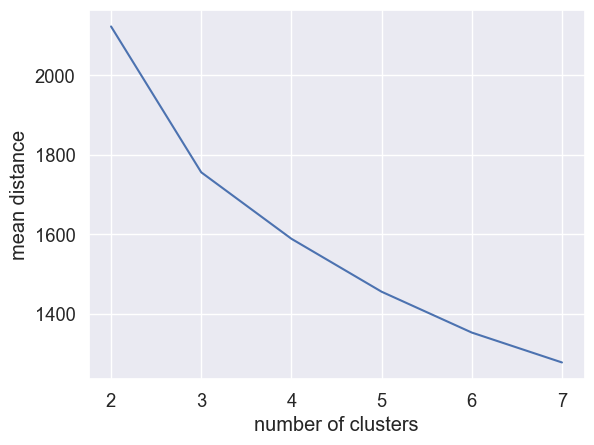

In [29]:
# plot k clusters vs mean distance from centroid
plt.plot(mean_d_dict.keys(), mean_d_dict.values())
plt.xlabel('number of clusters')
plt.ylabel('mean distance')

# 8 Discussion

# 9 Recommendation